In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

- A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

- PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that we can plot and understand the data better.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

<IPython.core.display.Javascript object>

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
Y = iris.iloc[:,-1:]
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


# Standardize the Data
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.



In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [22]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(data = X, columns = features).head()

<IPython.core.display.Javascript object>

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# PCA Projection to 3D

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=3)

In [26]:
principalComponents = pca.fit_transform(X)

In [27]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

<IPython.core.display.Javascript object>

In [28]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [65]:
column = ['species']
target = pd.DataFrame(data = Y, columns = column)
target

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [66]:
finalDf = pd.concat([principalDf, target ], axis = 1)
finalDf.head(9)

,principal component 1,principal component 2,principal component 3,species
0,-2.684207,0.326607,-0.021512,setosa
1,-2.715391,-0.169557,-0.203521,setosa
2,-2.889820,-0.137346,0.024709,setosa
3,-2.746437,-0.311124,0.037672,setosa
4,-2.728593,0.333925,0.096230,setosa
5,-2.279897,0.747783,0.174326,setosa
6,-2.820891,-0.082105,0.264251,setosa
7,-2.626482,0.170405,-0.015802,setosa
8,-2.887959,-0.570798,0.027335,setosa


# Visualize 3D Projection
Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

KeyError: 'target'

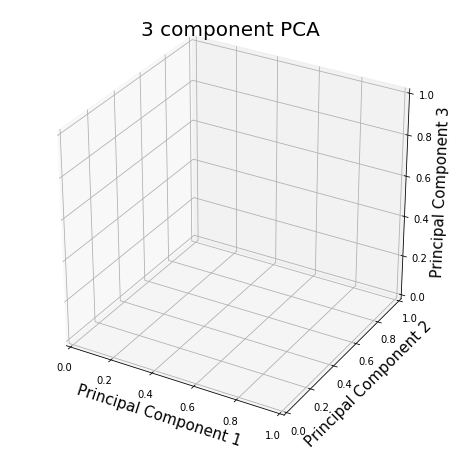

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

